**Final Project**

---



Bharath Kumar Gopu

Dinesh Garampally

Praveen Kumar Keshaboina




# **Loading the data**

In [ ]:
from google.colab import drive
import pandas as pd
import warnings

drive.mount('/content/drive')

file_path = '/content/drive/Shareddrives/DATA602_Final_Project/Crash_Report_Data.csv'
pd.set_option('display.max_columns', None)
crashData = pd.read_csv(file_path, low_memory=False)

warnings.filterwarnings("ignore") #ignoring any warnings

import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


Dataset Reference - https://catalog.data.gov/dataset/crash-reporting-drivers-data

# **Exploratory Data Analysis (EDA)**

In [ ]:
crashData

Report Number Local Case Number                Agency Name  \
0        MCP3040003N         190026050   Montgomery County Police   
1         EJ78850038         230034791  Gaithersburg Police Depar   
2        MCP2009002G         230034583   Montgomery County Police   
3        MCP3201004C         230035036   Montgomery County Police   
4        MCP23290028         230035152   Montgomery County Police   
...              ...               ...                        ...   
168510    DM8338000C          16010228  Takoma Park Police Depart   
168511   MCP1182001S         170519976   Montgomery County Police   
168512   MCP1453008X         200046217   Montgomery County Police   
168513   MCP2568000M         190056701   Montgomery County Police   
168514   MCP1048000P          15003337   Montgomery County Police   

             ACRS Report Type         Crash Date/Time        Route Type  \
0       Property Damage Crash  05/31/2019 03:00:00 PM               NaN   
1       Property Damage Crash  07/21/2023 05:59:00 PM  Maryland (State)   
2       Property Damage Crash  07/20/2023 03:10:00 PM  Maryland (State)   
3       Property Damage Crash  07/23/2023 12:10:00 PM            County   
4       Property Damage Crash  07/24/2023 06:10:00 AM            County   
...                       ...                     ...               ...   
168510  Property Damage Crash  03/01/2016 10:01:00 AM      Municipality   
168511  Property Damage Crash  07/19/2017 02:22:00 PM            County   
168512  Property Damage Crash  11/23/2020 07:37:00 AM  Maryland (State)   
168513  Property Damage Crash  11/23/2019 11:23:00 PM            County   
168514  Property Damage Crash  01/21/2015 09:02:00 AM  Maryland (State)   

                       Road Name Cross-Street Type  \
0                            NaN               NaN   
1                   FREDERICK RD           Unknown   
2                    GEORGIA AVE  Maryland (State)   
3                CRYSTAL ROCK DR            County   
4         MONTGOMERY VILLAGE AVE            County   
...                          ...               ...   
168510  NEW HAMPSHIRE SERVICE LA      Municipality   
168511                  CEDAR LA  Maryland (State)   
168512                  RIDGE RD           Unknown   
168513            SHADY GROVE RD              Ramp   
168514              FREDERICK RD      Municipality   

                            Cross-Street Name            Off-Road Description  \
0                                         NaN  PARKING LOT OF 3215 SPARTAN RD   
1                             WATKINS MILL RD                             NaN   
2                                  NORBECK RD                             NaN   
3                           WATERS LANDING DR                             NaN   
4                                CENTERWAY RD                             NaN   
...                                       ...                             ...   
168510                     PRINCE GEORGES AVE                             NaN   
168511                      OLD GEORGETOWN RD                             NaN   
168512                     LITTLE SENECA PKWY                             NaN   
168513  RAMP 9 FR IS 370 EB TO SHADY GROVE RD                             NaN   
168514                              W GUDE DR                             NaN   

       Municipality Related Non-Motorist           Collision Type  Weather  \
0               NaN                  NaN                    OTHER    CLEAR   
1               NaN                  NaN  STRAIGHT MOVEMENT ANGLE    CLEAR   
2               NaN                  NaN  STRAIGHT MOVEMENT ANGLE    CLEAR   
3               NaN                  NaN  STRAIGHT MOVEMENT ANGLE    CLEAR   
4               NaN                  NaN        HEAD ON LEFT TURN   CLOUDY   
...             ...                  ...                      ...      ...   
168510  TAKOMA PARK                  NaN                    OTHER    CLEAR   
168511          NaN            

In [ ]:
#checking crash data info
crashData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168515 entries, 0 to 168514
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   168515 non-null  object 
 1   Local Case Number               168515 non-null  object 
 2   Agency Name                     168515 non-null  object 
 3   ACRS Report Type                168515 non-null  object 
 4   Crash Date/Time                 168515 non-null  object 
 5   Route Type                      151898 non-null  object 
 6   Road Name                       152884 non-null  object 
 7   Cross-Street Type               151867 non-null  object 
 8   Cross-Street Name               152873 non-null  object 
 9   Off-Road Description            15629 non-null   object 
 10  Municipality                    18551 non-null   object 
 11  Related Non-Motorist            5338 non-null    object 
 12  Collision Type  

In [ ]:
# Copying crash data dataframe for future use
CrashDataCopy=crashData.copy()

# checking missing values
missing_values = crashData.isnull().sum()
print(missing_values)

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16617
Road Name                          15631
Cross-Street Type                  16648
Cross-Street Name                  15642
Off-Road Description              152886
Municipality                      149964
Related Non-Motorist              163177
Collision Type                       573
Weather                            13094
Surface Condition                  19732
Light                               1399
Traffic Control                    25009
Driver Substance Abuse             30690
Non-Motorist Substance Abuse      164296
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      137913
Driver Distracted By                   0
Drivers License 

# **Visualizing Crash Hotspots in Montgomery County with HeatMap**

In [ ]:
import folium
from folium.plugins import HeatMap


# Creating a base map centered on the mean latitude and longitude
map_center = [crashData['Latitude'].mean(), crashData['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Filtering out NaN values in Latitude and Longitude
locations = crashData[['Latitude', 'Longitude']].dropna()

# Converting the DataFrame to a list of lists for the HeatMap function
location_list = locations.values.tolist()

# Adding a HeatMap layer to the map
HeatMap(location_list).add_to(mymap)

# Displaying the map inline in Jupyter Notebook
mymap


In [ ]:
# We are calculating top 5 location with most crashes.

# Count occurrences of each location
top_locations = crashData['Location'].value_counts().head(5)

# Printing the top 5 locations
print("Top 5 locations with the most crashes:")
print(top_locations)


Top 5 locations with the most crashes:
(38.953, -77.338)              45
(39.11342767, -77.23648183)    29
(39.045425, -76.99073667)      26
(39.04627667, -76.990695)      24
(39.07997592, -77.13826298)    20
Name: Location, dtype: int64


Latitude: 38.953, Longitude: -77.338 -> Location: 1930, Isaac Newton Square, Reston, Fairfax County, Virginia, 20190, United States, Crashes: 45
Latitude: 39.11342767, Longitude: -77.23648183 -> Location: Edison Park Drive, Kentlands, Gaithersburg, Montgomery County, Maryland, 20878, United States, Crashes: 29
Latitude: 39.045425, Longitude: -76.99073667 -> Location: 1002, Milestone Drive, Springbrook Manor, Silver Spring, Montgomery County, Maryland, 20904, United States, Crashes: 26
Latitude: 39.04627667, Longitude: -76.990695 -> Location: 11760, Sherebrooke Woods Lane, Springbrook Manor, White Oak, Montgomery County, Maryland, 20904, United States, Crashes: 23
Latitude: 39.07997592, Longitude: -77.13826298 -> Location: Veirs Mill Road, Rockcrest, Rockville, Montgomery County, Maryland, 20851, United States, Crashes: 20


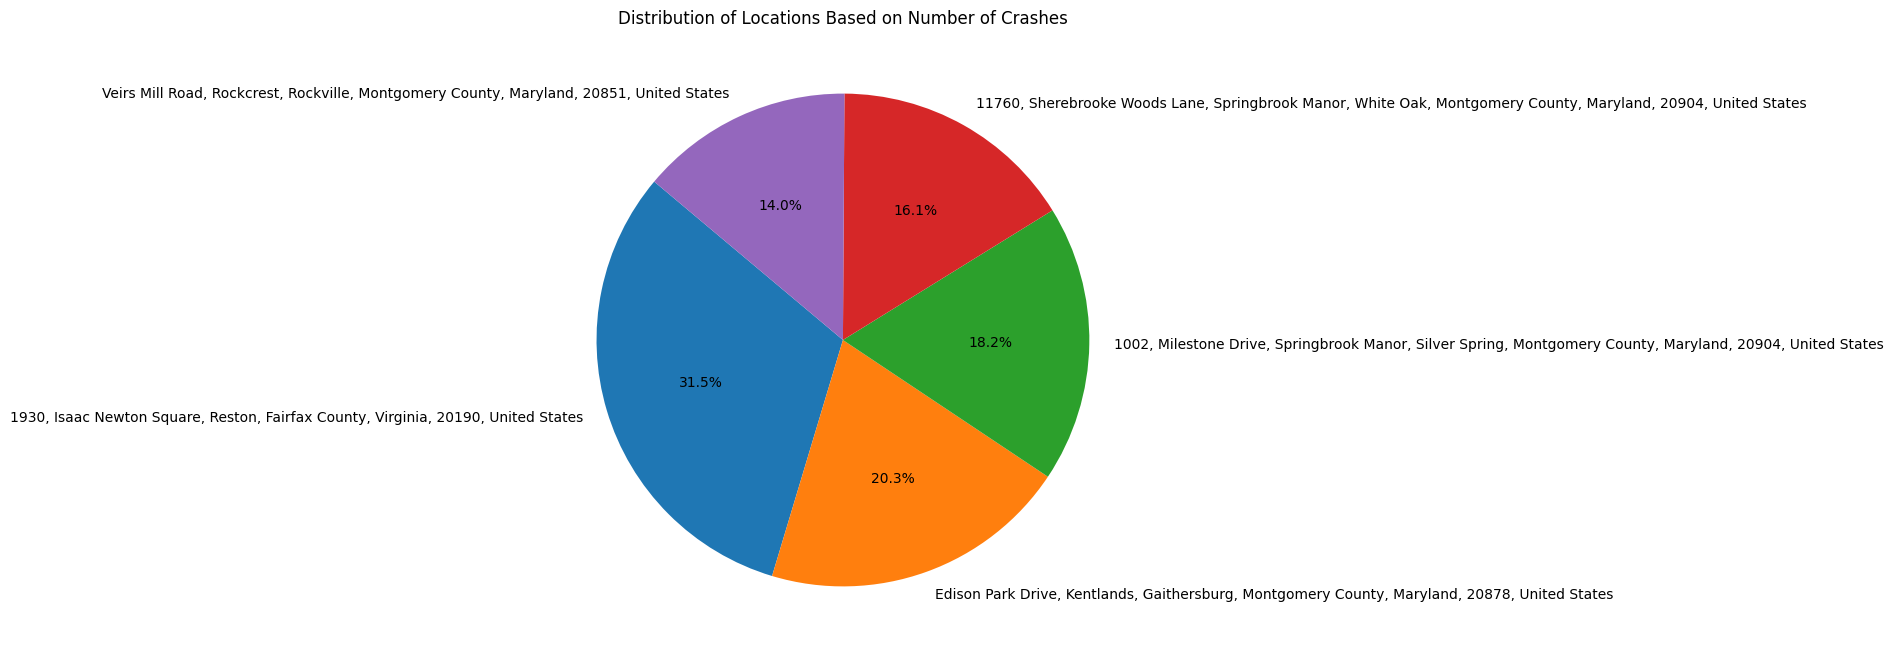

In [ ]:
# Finding out the top 5 areas where most crashes occured from 2015 to 2023
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Creating a geolocator object
geolocator = Nominatim(user_agent="my_reverse_geocoder")

# Defining the coordinates and associated crash counts
coordinates_crashes = {
    (38.953, -77.338): 45,
    (39.11342767, -77.23648183): 29,
    (39.045425, -76.99073667): 26,
    (39.04627667, -76.990695): 23,
    (39.07997592, -77.13826298): 20
}

locations = []
for (lat, lon), crash_count in coordinates_crashes.items():
    location = geolocator.reverse((lat, lon), language='en')
    locations.append((location.address, crash_count))
    print(f"Latitude: {lat}, Longitude: {lon} -> Location: {location.address}, Crashes: {crash_count}")

# Ploting the data using a pie chart
plt.figure(figsize=(8, 8))
labels = [location[0] for location in locations]
crash_counts = [location[1] for location in locations]
plt.pie(crash_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Locations Based on Number of Crashes')
plt.show()


# **Crash Severity Distribution in Montgomery County**

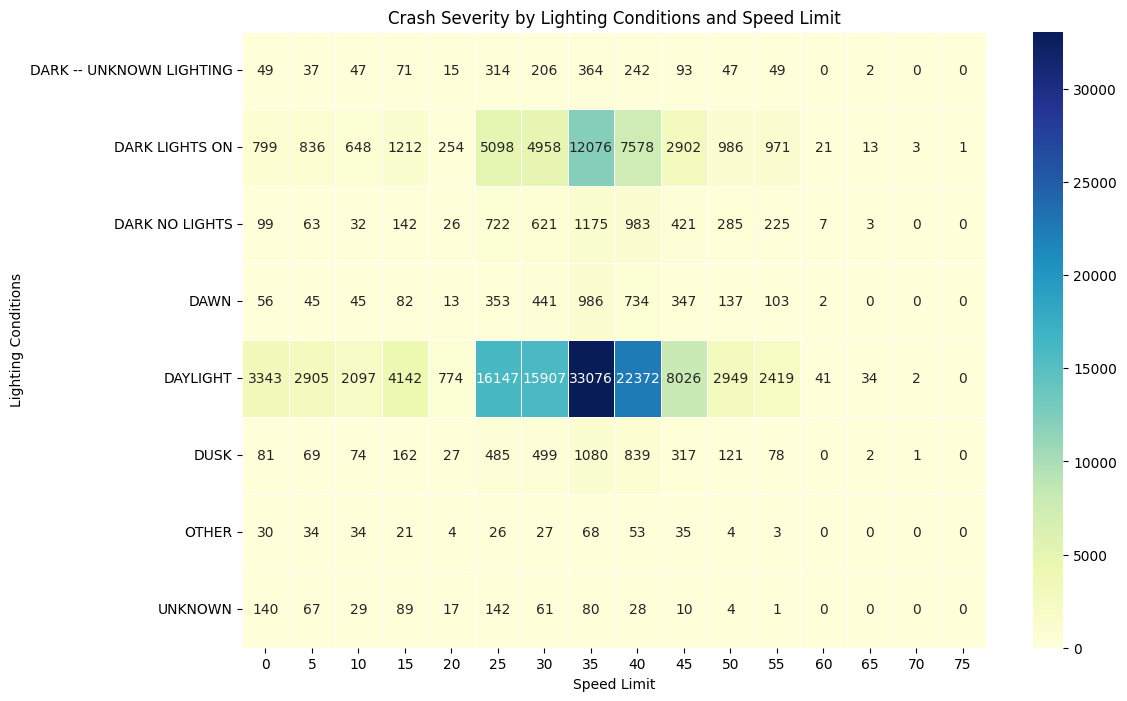

In [ ]:
severity_pivot = pd.pivot_table(crashData, values='Person ID', index='Light', columns='Speed Limit',
                                aggfunc=lambda x: x.nunique(), fill_value=0)

# Displaying the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(severity_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Crash Severity by Lighting Conditions and Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Lighting Conditions')
plt.show()

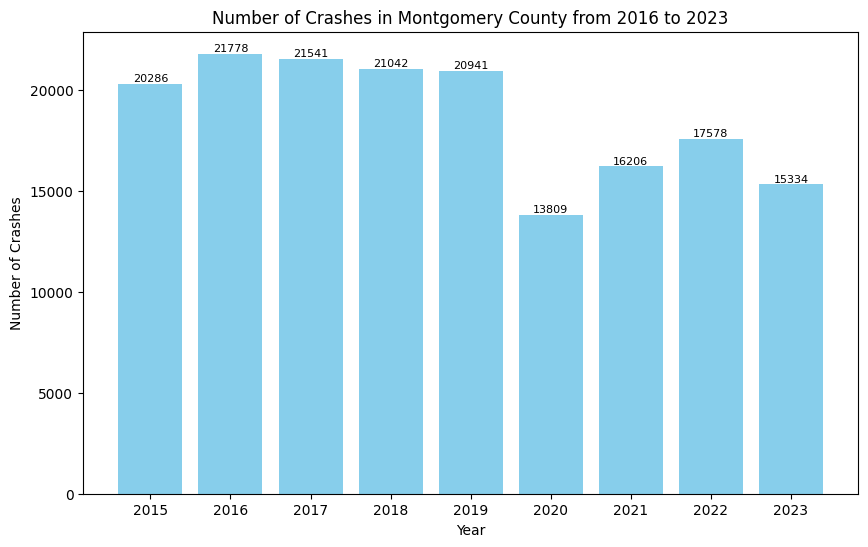

In [ ]:

crashData['Crash Date/Time'] = pd.to_datetime(crashData['Crash Date/Time'])
crashData['Year'] = crashData['Crash Date/Time'].dt.year

# Filtering data for the years 2015 to 2023
filtered_data = crashData[(crashData['Year'] >= 2015) & (crashData['Year'] <= 2023)]

# Counting the number of crashes for each year
crashes_by_year = filtered_data['Year'].value_counts().sort_index()

# Ploting the data with count annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(crashes_by_year.index, crashes_by_year, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), ha='center', va='bottom', fontsize=8)

plt.xticks(crashes_by_year.index)

plt.title('Number of Crashes in Montgomery County from 2016 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()


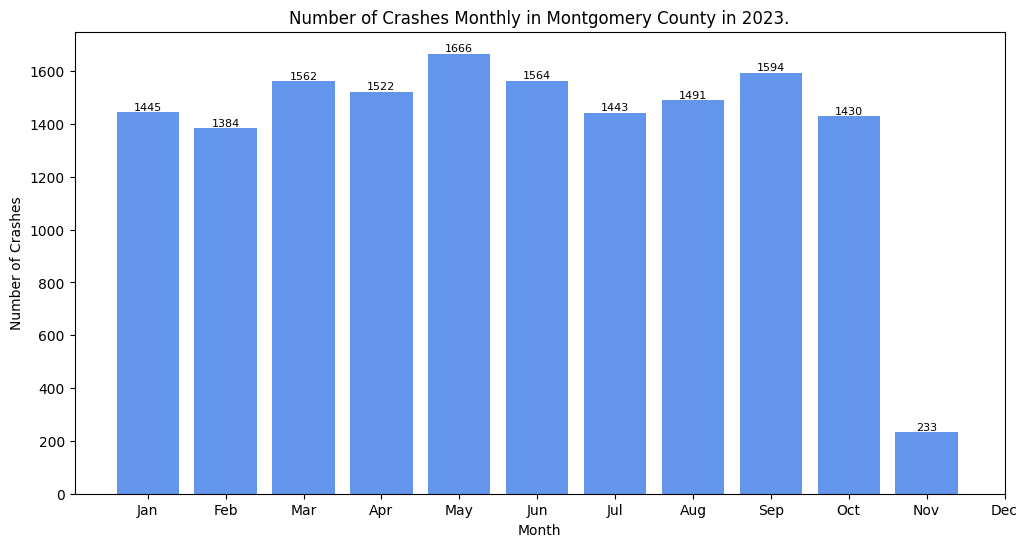

In [ ]:
# Filtering data for the year 2023
data_2023 = crashData[crashData['Year'] == 2023]
# Counting the number of crashes for each month
crashes_by_month = data_2023.groupby(data_2023['Crash Date/Time'].dt.month)['Report Number'].count()

plt.figure(figsize=(12, 6))
bars = plt.bar(crashes_by_month.index, crashes_by_month, color='cornflowerblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), ha='center', va='bottom', fontsize=8)

plt.title('Number of Crashes Monthly in Montgomery County in 2023.')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


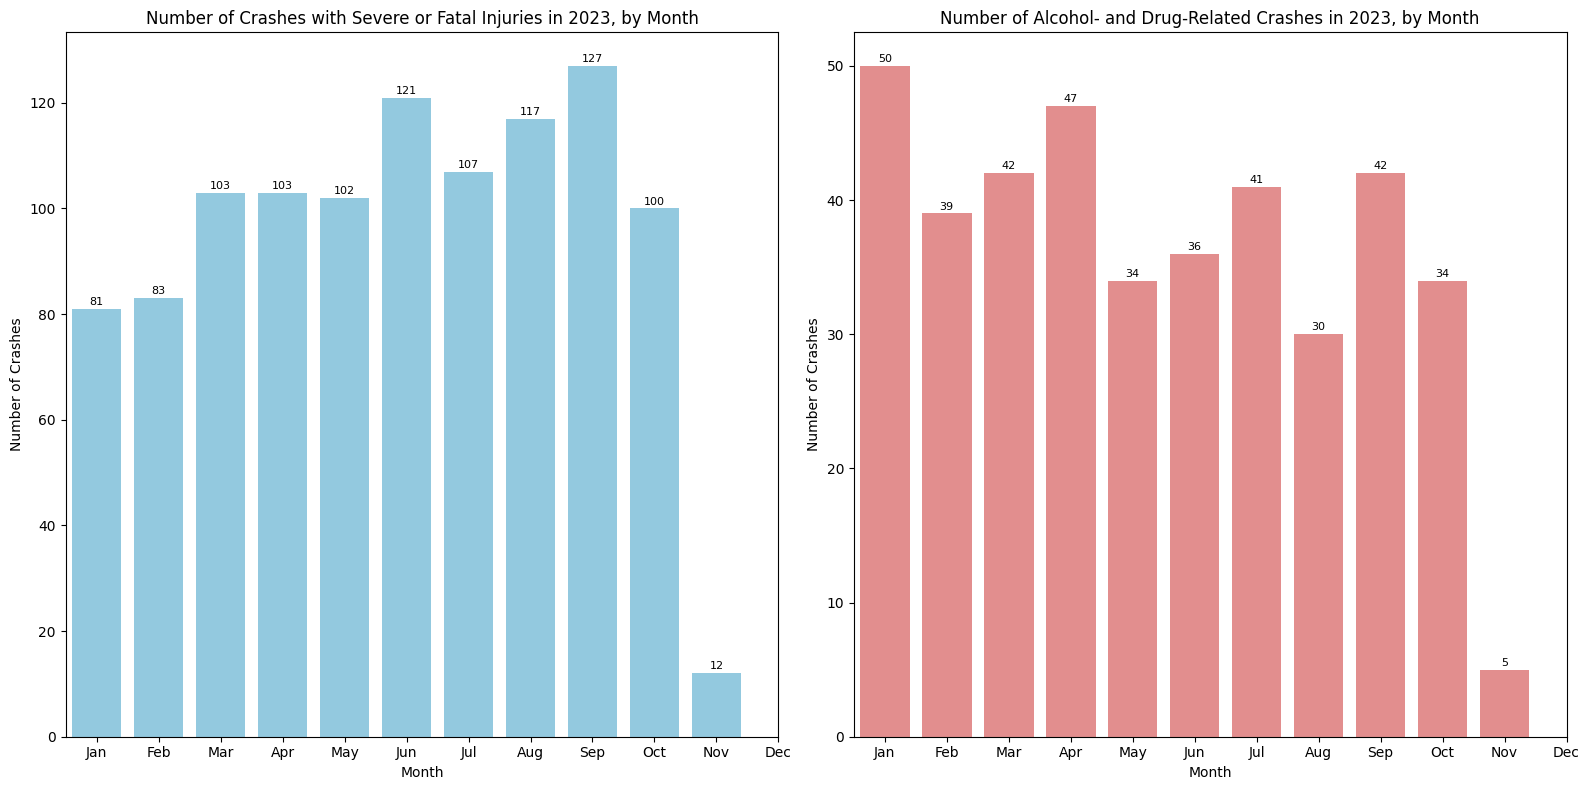

In [ ]:
# We are taking alcohol and illegal drug use into consideration to plot number of crashes in montgomery county
substance_abuse_values = ['ALCOHOL CONTRIBUTED', 'ALCOHOL PRESENT', 'ILLEGAL DRUG CONTRIBUTED', 'ILLEGAL DRUG PRESENT']
filtered_data_abuse = data_2023[data_2023['Driver Substance Abuse'].isin(substance_abuse_values)]

severity_values = ['FATAL INJURY', 'SUSPECTED MINOR INJURY', 'SUSPECTED SERIOUS INJURY']
filtered_data_severity = data_2023[data_2023['Injury Severity'].isin(severity_values)]

crashes_by_month_severity = filtered_data_severity.groupby(data_2023['Crash Date/Time'].dt.month)['Report Number'].count().reset_index(name='Crash Count Severity')
crashes_by_month_abuse = filtered_data_abuse.groupby(data_2023['Crash Date/Time'].dt.month)['Report Number'].count().reset_index(name='Crash Count Abuse')

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Crash Date/Time', y='Crash Count Severity', data=crashes_by_month_severity, color='skyblue')
plt.title('Number of Crashes with Severe or Fatal Injuries in 2023, by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

for p in plt.gca().patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if the height is not NaN
        plt.gca().annotate(f"{round(height)}", (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                           textcoords='offset points')

# Plot for Driver Substance Abuse
plt.subplot(1, 2, 2)
sns.barplot(x='Crash Date/Time', y='Crash Count Abuse', data=crashes_by_month_abuse, color='lightcoral')
plt.title('Number of Alcohol- and Drug-Related Crashes in 2023, by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add count annotations on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if the height is not NaN
        plt.gca().annotate(f"{round(height)}", (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                           textcoords='offset points')

plt.tight_layout()
plt.show()


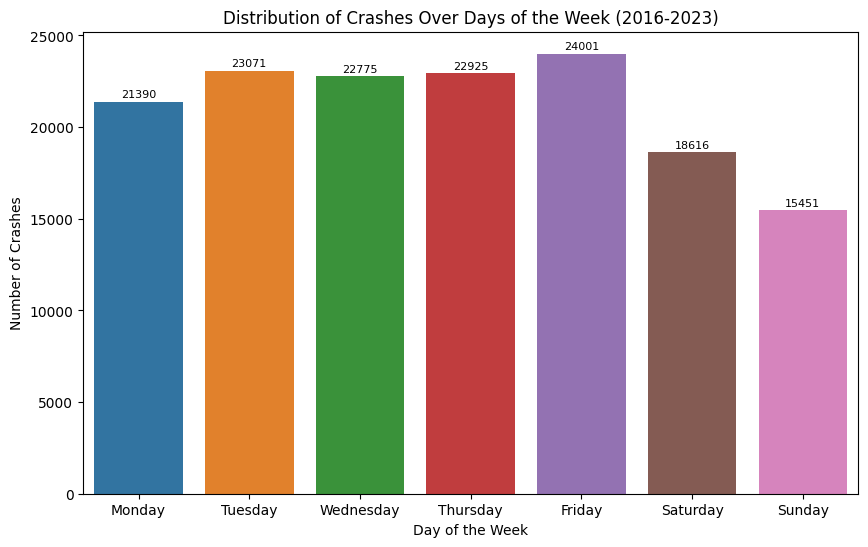

In [ ]:
crashData['Crash Date/Time'] = pd.to_datetime(crashData['Crash Date/Time'])

crashData['Year'] = crashData['Crash Date/Time'].dt.year

# Filtering data for the years 2016 to 2023
filtered_data = crashData[(crashData['Year'] >= 2016) & (crashData['Year'] <= 2023)]
filtered_data['crashDay'] = filtered_data['Crash Date/Time'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='crashDay', data=filtered_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Distribution of Crashes Over Days of the Week (2016-2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()


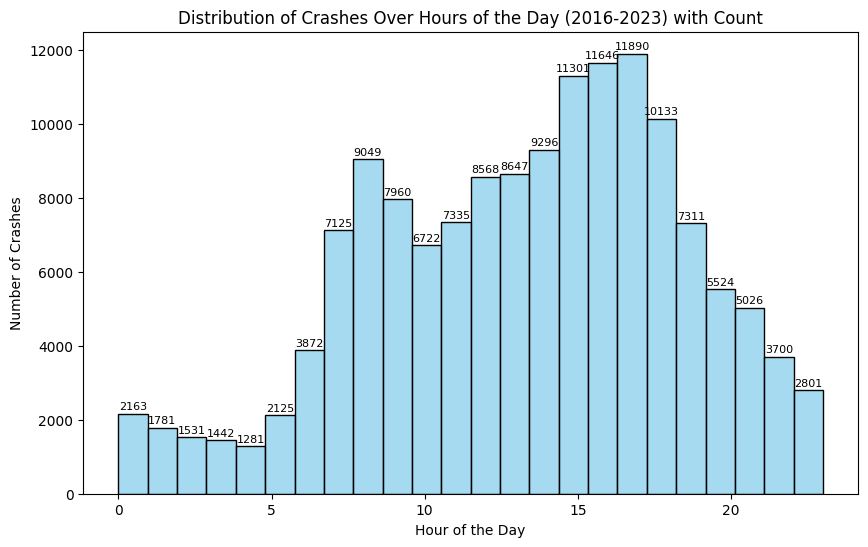

In [ ]:

crashData['Crash Hour'] = crashData['Crash Date/Time'].dt.hour

filtered_data = crashData[(crashData['Year'] >= 2016) & (crashData['Year'] <= 2023)]

# Plot the data with count annotations
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Crash Hour'], bins=24, kde=False, color='skyblue')

# Add count annotations on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Distribution of Crashes Over Hours of the Day (2016-2023) with Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

## **Driver Characteristics**

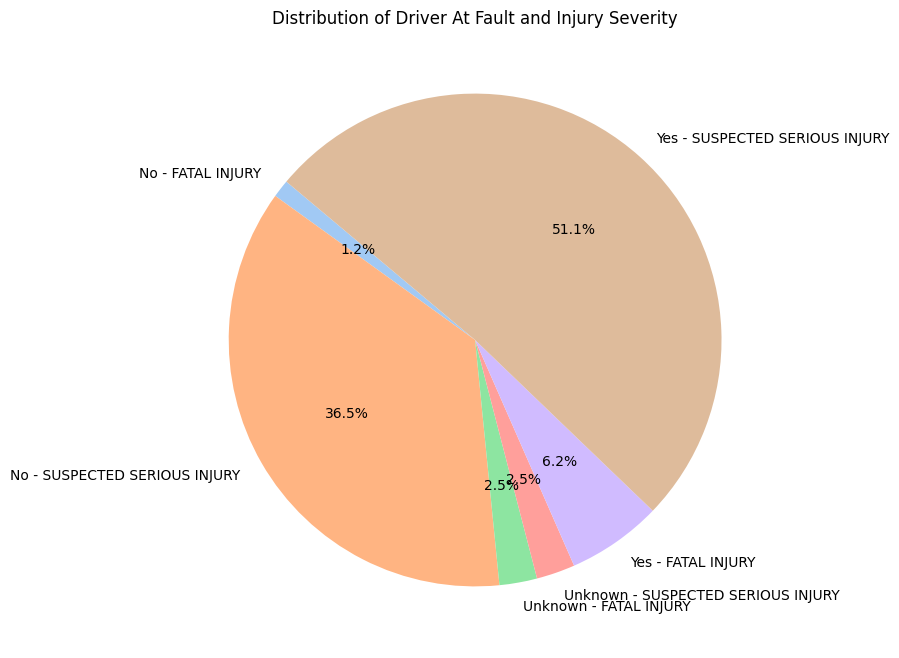

In [ ]:
filtered_data_fatal_serious = crashData[crashData['Injury Severity'].isin(['FATAL INJURY', 'SUSPECTED SERIOUS INJURY'])]

count_df = filtered_data_fatal_serious.groupby(['Driver At Fault', 'Injury Severity']).size().reset_index(name='Count')

# Plotting a pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', n_colors=len(count_df))
plt.pie(count_df['Count'], labels=count_df['Driver At Fault'] + ' - ' + count_df['Injury Severity'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Driver At Fault and Injury Severity')
plt.show()

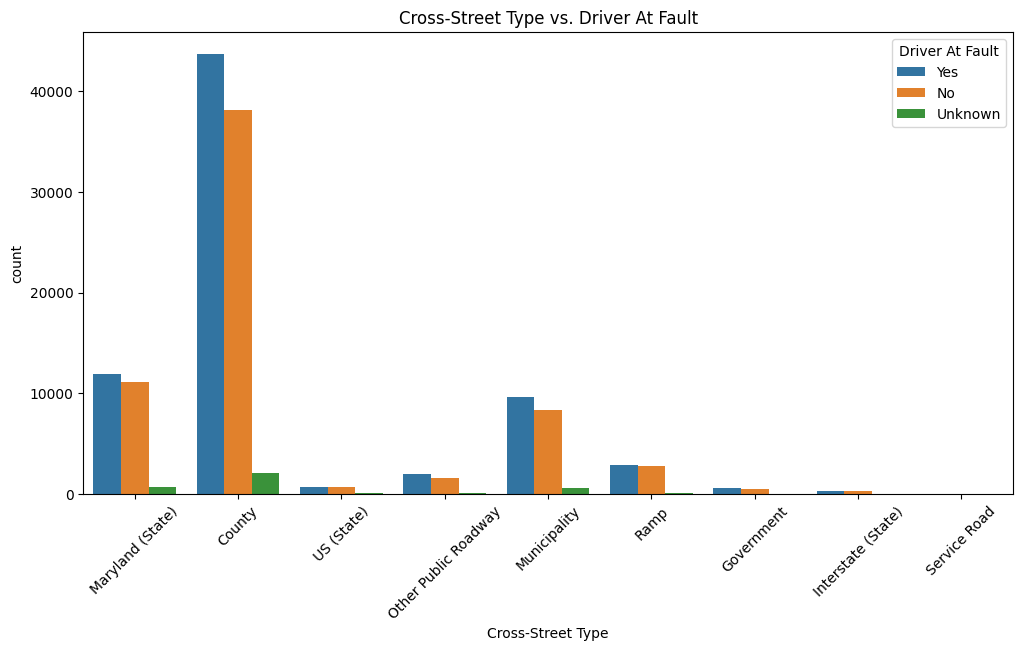

In [ ]:
filtered_data_no_unknown = crashData[crashData['Cross-Street Type'] != 'Unknown']

# Plot 'Cross-Street Type' vs. 'Driver At Fault'
plt.figure(figsize=(12, 6))
sns.countplot(x='Cross-Street Type', hue='Driver At Fault', data=filtered_data_no_unknown)
plt.title('Cross-Street Type vs. Driver At Fault')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

In [ ]:
CrashDataCopy

Report Number Local Case Number                Agency Name  \
0        MCP3040003N         190026050   Montgomery County Police   
1         EJ78850038         230034791  Gaithersburg Police Depar   
2        MCP2009002G         230034583   Montgomery County Police   
3        MCP3201004C         230035036   Montgomery County Police   
4        MCP23290028         230035152   Montgomery County Police   
...              ...               ...                        ...   
168510    DM8338000C          16010228  Takoma Park Police Depart   
168511   MCP1182001S         170519976   Montgomery County Police   
168512   MCP1453008X         200046217   Montgomery County Police   
168513   MCP2568000M         190056701   Montgomery County Police   
168514   MCP1048000P          15003337   Montgomery County Police   

             ACRS Report Type         Crash Date/Time        Route Type  \
0       Property Damage Crash  05/31/2019 03:00:00 PM               NaN   
1       Property Damage Crash  07/21/2023 05:59:00 PM  Maryland (State)   
2       Property Damage Crash  07/20/2023 03:10:00 PM  Maryland (State)   
3       Property Damage Crash  07/23/2023 12:10:00 PM            County   
4       Property Damage Crash  07/24/2023 06:10:00 AM            County   
...                       ...                     ...               ...   
168510  Property Damage Crash  03/01/2016 10:01:00 AM      Municipality   
168511  Property Damage Crash  07/19/2017 02:22:00 PM            County   
168512  Property Damage Crash  11/23/2020 07:37:00 AM  Maryland (State)   
168513  Property Damage Crash  11/23/2019 11:23:00 PM            County   
168514  Property Damage Crash  01/21/2015 09:02:00 AM  Maryland (State)   

                       Road Name Cross-Street Type  \
0                            NaN               NaN   
1                   FREDERICK RD           Unknown   
2                    GEORGIA AVE  Maryland (State)   
3                CRYSTAL ROCK DR            County   
4         MONTGOMERY VILLAGE AVE            County   
...                          ...               ...   
168510  NEW HAMPSHIRE SERVICE LA      Municipality   
168511                  CEDAR LA  Maryland (State)   
168512                  RIDGE RD           Unknown   
168513            SHADY GROVE RD              Ramp   
168514              FREDERICK RD      Municipality   

                            Cross-Street Name            Off-Road Description  \
0                                         NaN  PARKING LOT OF 3215 SPARTAN RD   
1                             WATKINS MILL RD                             NaN   
2                                  NORBECK RD                             NaN   
3                           WATERS LANDING DR                             NaN   
4                                CENTERWAY RD                             NaN   
...                                       ...                             ...   
168510                     PRINCE GEORGES AVE                             NaN   
168511                      OLD GEORGETOWN RD                             NaN   
168512                     LITTLE SENECA PKWY                             NaN   
168513  RAMP 9 FR IS 370 EB TO SHADY GROVE RD                             NaN   
168514                              W GUDE DR                             NaN   

       Municipality Related Non-Motorist           Collision Type  Weather  \
0               NaN                  NaN                    OTHER    CLEAR   
1               NaN                  NaN  STRAIGHT MOVEMENT ANGLE    CLEAR   
2               NaN                  NaN  STRAIGHT MOVEMENT ANGLE    CLEAR   
3               NaN                  NaN  STRAIGHT MOVEMENT ANGLE    CLEAR   
4               NaN                  NaN        HEAD ON LEFT TURN   CLOUDY   
...             ...                  ...                      ...      ...   
168510  TAKOMA PARK                  NaN                    OTHER    CLEAR   
168511          NaN            

In [ ]:
#  Dropping Unnecessary Columns
M_Data = CrashDataCopy.drop(['Report Number','Local Case Number','Related Non-Motorist','Municipality', \
                         'Non-Motorist Substance Abuse','Off-Road Description', \
                         'Circumstance','Person ID', 'Latitude','Longitude','Location','Vehicle ID', \
                        'Agency Name','Vehicle First Impact Location','Vehicle Second Impact Location' \
             ,'Road Name','Driverless Vehicle','Cross-Street Name','Cross-Street Type'], axis=1)

In [ ]:
# Extracting Day, Month, Year, and Hour from the timestamp
M_Data['Day'] = pd.to_datetime(M_Data['Crash Date/Time']).dt.day
M_Data['Month'] = pd.to_datetime(M_Data['Crash Date/Time']).dt.month
M_Data['Year'] = pd.to_datetime(M_Data['Crash Date/Time']).dt.year
M_Data['Hour'] = pd.to_datetime(M_Data['Crash Date/Time']).dt.hour

# Dropping the original 'Crash Date/Time' column
M_Data.drop(['Crash Date/Time'],axis=1, inplace=True)
# Adding a new column 'crashDay' with the day name of the week
M_Data['crashDay'] = pd.to_datetime(crashData['Crash Date/Time']) .dt.day_name()

In [ ]:
# Filling missing values with 'Unknown'
M_Data.fillna('Unknown', inplace=True)
# Replacing variations of 'UNKNOWN' and 'OTHER' with 'Unknown'
M_Data.replace(['UNKNOWN', 'OTHER'],'Unknown', inplace=True)

In [ ]:
M_Data = M_Data[(M_Data['Vehicle Year'] >= 1970) & (M_Data['Vehicle Year'] <= 2023)]

In [ ]:
current_year = pd.to_datetime('now').year
M_Data['Vehicle_Age'] = current_year - M_Data['Vehicle Year']

In [ ]:
M_Data.drop('Vehicle Year', axis=1,inplace=True)

In [ ]:
States = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

In [ ]:
# Filtering Data Based on Driver's License State
M_Data = M_Data[M_Data['Drivers License State'].isin(States)]

Make_values_with_count_1 = M_Data['Vehicle Model'].value_counts().loc[lambda x: x == 1].index.tolist()

# Filtering Out Data with Vehicle Make Count 1 and Dropping 'Vehicle Make' and 'Vehicle Model' columns
M_Data = M_Data[~M_Data['Vehicle Make'].isin(Make_values_with_count_1)]
M_Data.drop(['Vehicle Make','Vehicle Model'],axis=1, inplace=True)

In [ ]:
for i in M_Data.columns:
    print(f'{i} "=======" {M_Data[i].unique()} "=======" {M_Data[i].nunique()} \n')

ACRS Report Type "=======" ['Property Damage Crash' 'Injury Crash' 'Fatal Crash'] "=======" 3 

Route Type "=======" ['Maryland (State)' 'County' 'Unknown' 'US (State)' 'Municipality'
 'Interstate (State)' 'Other Public Roadway' 'Ramp' 'Government'
 'Service Road'] "=======" 10 

Collision Type "=======" ['STRAIGHT MOVEMENT ANGLE' 'HEAD ON LEFT TURN' 'SAME DIR REAR END'
 'SINGLE VEHICLE' 'HEAD ON' 'OPPOSITE DIRECTION SIDESWIPE'
 'SAME DIRECTION RIGHT TURN' 'Unknown' 'ANGLE MEETS LEFT TURN'
 'SAME DIRECTION SIDESWIPE' 'ANGLE MEETS RIGHT TURN'
 'SAME DIRECTION LEFT TURN' 'SAME DIR REND RIGHT TURN'
 'ANGLE MEETS LEFT HEAD ON' 'SAME DIR BOTH LEFT TURN'
 'OPPOSITE DIR BOTH LEFT TURN' 'SAME DIR REND LEFT TURN'] "=======" 17 

Weather "=======" ['CLEAR' 'CLOUDY' 'Unknown' 'RAINING' 'FOGGY' 'SNOW' 'BLOWING SNOW'
 'WINTRY MIX' 'SEVERE WINDS' 'SLEET' 'BLOWING SAND, SOIL, DIRT'] "=======" 11 

Surface Condition "=======" ['DRY' 'Unknown' 'WET' 'WATER(STANDING/MOVING)' 'MUD, DIRT, GRAVEL' 'ICE'
 '

In [ ]:
# dividing categorical and not-categorical values
Categorical_columns = M_Data.columns.tolist()

not_categorical_columns = ['Speed Limit','Day','Hour','Month','Year','Vehicle_Age']

In [ ]:
filtered_list = [x for x in Categorical_columns if x not in not_categorical_columns]
filtered_list.remove('Injury Severity')
filtered_list

['ACRS Report Type',
 'Route Type',
 'Collision Type',
 'Weather',
 'Surface Condition',
 'Light',
 'Traffic Control',
 'Driver Substance Abuse',
 'Driver At Fault',
 'Driver Distracted By',
 'Drivers License State',
 'Vehicle Damage Extent',
 'Vehicle Body Type',
 'Vehicle Movement',
 'Vehicle Continuing Dir',
 'Vehicle Going Dir',
 'Parked Vehicle',
 'Equipment Problems',
 'crashDay']

# **Model Training and Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = M_Data.drop('Injury Severity', axis=1)

y = M_Data['Injury Severity']

# Use OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[filtered_list])

# Combine encoded features with numerical features
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(filtered_list), index=X.index)
X_final = pd.concat([X.drop(filtered_list, axis=1), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
scaler = StandardScaler()
X_train[not_categorical_columns] = scaler.fit_transform(X_train[not_categorical_columns])
X_test[not_categorical_columns] = scaler.transform(X_test[not_categorical_columns])

In [ ]:
X_train

Speed Limit       Day     Month      Year      Hour  Vehicle_Age  \
158048     0.184768  0.033474  1.267519  0.526691 -1.603193     1.037301   
144761     0.652053  0.147595 -0.184455 -1.045593 -0.066251     0.401221   
32896     -0.749803  0.718201 -1.346034  0.526691 -0.642604    -1.188978   
81912      0.184768 -1.107737  0.977125  0.526691  0.510102    -0.552898   
64527      0.184768 -0.993616  0.105940  1.312833  1.470691    -0.234858   
...             ...       ...       ...       ...       ...          ...   
133877     0.652053  0.832322  0.686730 -0.259451 -0.450486    -1.029958   
145510     1.119339 -1.221858  1.267519 -0.652522 -1.026840     1.037301   
125928     0.184768  1.174685  1.267519  0.133620 -0.258369    -0.234858   
160129    -0.749803  1.288806  1.267519  1.312833 -0.066251    -0.234858   
148029    -0.282518  0.375837  0.977125 -0.652522 -1.411075    -1.029958   

        ACRS Report Type_Injury Crash  ACRS Report Type_Property Damage Crash  \
158048                            1.0                                     0.0   
144761                            1.0                                     0.0   
32896                             1.0                                     0.0   
81912                             0.0                                     1.0   
64527                             0.0                                     1.0   
...                               ...                                     ...   
133877                            1.0                                     0.0   
145510                            1.0                                     0.0   
125928                            1.0                                     0.0   
160129                            0.0                                     1.0   
148029                            0.0                                     1.0   

        Route Type_Government  Route Type_Interstate (State)  \
158048                    0.0                            0.0   
144761                    0.0                            0.0   
32896                     0.0                            0.0   
81912                     0.0                            0.0   
64527                     0.0                            0.0   
...                       ...                            ...   
133877                    0.0                            0.0   
145510                    0.0                            0.0   
125928                    0.0                            0.0   
160129                    0.0                            0.0   
148029                    0.0                            0.0   

        Route Type_Maryland (State)  Route Type_Municipality  \
158048                          1.0                      0.0   
144761                          1.0                      0.0   
32896                           0.0                      0.0   
81912                           0.0                      0.0   
64527                           1.0                      0.0   
...                             ...                      ...   
133877                          1.0                      0.0   
145510                          1.0                      0.0   
125928                          0.0                      0.0   
160129                          0.0                      0.0   
148029                          1.0                      0.0   

        Route Type_Other Public Roadway  Route Type_Ramp  \
158048                              0.0              0.0   
144761                              0.0              0.0   
32896                               0.0              0.0   
81912                               0.0              0.0   
64527                               0.0              0.0   
...                                 ...              ...   
133877                              0.0              0.0   
145510                              0.0              0.0   
125928                              0.0     

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111073, 222), (27769, 222), (111073,), (27769,))

In [ ]:
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

In [ ]:
y_train_encoded

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape

((111073, 222), (27769, 222), (111073, 5), (27769, 5))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

base_estimator = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)

y_train_one = np.argmax(y_train_encoded, axis=1)
y_test_one = np.argmax(y_test_encoded, axis=1)

complex_dt_model = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=100,
    random_state=42
)

complex_dt_model.fit(X_train, y_train_one)
complex_dt_pred = complex_dt_model.predict(X_train)

complex_dt_accuracy = accuracy_score(y_train_one, complex_dt_pred)
complex_dt_classification_report = classification_report(y_train_one, complex_dt_pred, zero_division=1)

print("\nComplex AdaBoostClassifier:")
print(f"Accuracy: {complex_dt_accuracy}")
print("Classification Report:\n", complex_dt_classification_report)

complex_dt_test_pred = complex_dt_model.predict(X_test)

complex_dt_accuracy = accuracy_score(y_test_one, complex_dt_test_pred)
complex_dt_classification_report = classification_report(y_test_one, complex_dt_test_pred, zero_division=1)

print("\nComplex AdaBoostClassifier:")
print(f"Accuracy: {complex_dt_accuracy}")
print("Classification Report:\n", complex_dt_classification_report)


Complex AdaBoostClassifier:
Accuracy: 0.9233206989997569
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.94      0.98      0.96     89592
           2       0.80      0.68      0.74     12082
           3       0.86      0.66      0.74      8314
           4       1.00      0.97      0.99       970

    accuracy                           0.92    111073
   macro avg       0.92      0.86      0.89    111073
weighted avg       0.92      0.92      0.92    111073


Complex AdaBoostClassifier:
Accuracy: 0.8030537649897368
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.25      0.36        28
           1       0.87      0.94      0.91     22285
           2       0.37      0.29      0.32      3094
           3       0.30      0.17      0.22      2128
           4       0.33      0.00      0.01       234

    accuracy         

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
X_train[not_categorical_columns] = scaler.fit_transform(X_train[not_categorical_columns])
X_test[not_categorical_columns] = scaler.transform(X_test[not_categorical_columns])

# One-hot encoding the target variable
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Creating a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train_one)

# Making predictions on the training set
rf_train_pred = rf_model.predict(X_train)

# Evaluating the Random Forest model on the training set
rf_train_accuracy = accuracy_score(y_train_one, rf_train_pred)
print(f"Random Forest Training Accuracy: {rf_train_accuracy}")

# Making predictions on the test set
rf_test_pred = rf_model.predict(X_test)

# Evaluating the Random Forest model on the test set
rf_test_accuracy = accuracy_score(y_test_one, rf_test_pred)
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

print("Random Forest Classification Report (Test Set):\n", classification_report(y_test_one, rf_test_pred, zero_division=1))


Random Forest Training Accuracy: 0.999864953679112
Random Forest Test Accuracy: 0.8181065216608449
Random Forest Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.21      0.34        28
           1       0.87      0.96      0.91     22285
           2       0.42      0.31      0.36      3094
           3       0.36      0.12      0.18      2128
           4       0.12      0.00      0.01       234

    accuracy                           0.82     27769
   macro avg       0.53      0.32      0.36     27769
weighted avg       0.77      0.82      0.79     27769



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
X_train[not_categorical_columns] = scaler.fit_transform(X_train[not_categorical_columns])
X_test[not_categorical_columns] = scaler.transform(X_test[not_categorical_columns])

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Creating a Logistic Regression model
lr_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)

# Setting up parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Performing grid search with cross-validation
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_one)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Training the model with the best parameters
best_lr_model = grid_search.best_estimator_
# Make predictions on the train set
lr_train_pred = best_lr_model.predict(X_train)

# Evaluating the Logistic Regression model on the train set
lr_train_accuracy = accuracy_score(y_train_one, lr_train_pred)
print(f"Logistic Regression (L2) Train Accuracy: {lr_train_accuracy}")

print("Logistic Regression (L2) Classification Report (Train Set):\n", classification_report(y_train_one, lr_train_pred, zero_division=1))

# Making predictions on the test set
lr_test_pred = best_lr_model.predict(X_test)

# Evaluating the Logistic Regression model on the test set
lr_test_accuracy = accuracy_score(y_test_one, lr_test_pred)
print(f"Logistic Regression (L2) Test Accuracy: {lr_test_accuracy}")

print("Logistic Regression (L2) Classification Report (Test Set):\n", classification_report(y_test_one, lr_test_pred, zero_division=1))


Best Parameters: {'C': 0.1}
Logistic Regression (L2) Train Accuracy: 0.827212733967751
Logistic Regression (L2) Classification Report (Train Set):
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       115
           1       0.88      0.97      0.92     89592
           2       0.41      0.33      0.37     12082
           3       0.41      0.15      0.22      8314
           4       0.43      0.03      0.06       970

    accuracy                           0.83    111073
   macro avg       0.59      0.45      0.47    111073
weighted avg       0.79      0.83      0.80    111073

Logistic Regression (L2) Test Accuracy: 0.8206993409917533
Logistic Regression (L2) Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.88      0.96      0.92     22285
           2       0.40      0.32      0.36      3094
           3       0.38    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers

scaler = StandardScaler()
X_train[not_categorical_columns] = scaler.fit_transform(X_train[not_categorical_columns])
X_test[not_categorical_columns] = scaler.transform(X_test[not_categorical_columns])

# One-hot encoding the target variable
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Neural Network Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(len(encoder.categories_[0]), activation='softmax')
])

# Adjusting the learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Setting class weights
class_weights = {0: 1.0, 1: 1.0, 2: 2.0, 3: 2.0, 4: 3.0}

# Training the model
model.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_split=0.1, class_weight=class_weights)

# Evaluating the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded)
print(f"Training Accuracy: {train_accuracy}")

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Printing classification report for the test set
print("Classification Report (Test Set):\n", classification_report(y_test_one, y_pred_classes, zero_division=1))

classification_report_str = classification_report(y_test_encoded.argmax(axis=1), y_pred_classes, zero_division=1)
print("Classification Report (Test Set):\n", classification_report_str)



Epoch 1/25
3124/3124 [==============================] - 20s 6ms/step - loss: 0.8155 - accuracy: 0.7619 - val_loss: 0.4143 - val_accuracy: 0.8015
Epoch 2/25
3124/3124 [==============================] - 17s 5ms/step - loss: 0.6821 - accuracy: 0.7966 - val_loss: 0.3947 - val_accuracy: 0.8046
Epoch 3/25
3124/3124 [==============================] - 14s 5ms/step - loss: 0.6664 - accuracy: 0.7986 - val_loss: 0.3832 - val_accuracy: 0.8106
Epoch 4/25
3124/3124 [==============================] - 15s 5ms/step - loss: 0.6584 - accuracy: 0.8006 - val_loss: 0.3855 - val_accuracy: 0.8098
Epoch 5/25
3124/3124 [==============================] - 14s 4ms/step - loss: 0.6532 - accuracy: 0.8021 - val_loss: 0.3834 - val_accuracy: 0.8135
Epoch 6/25
3124/3124 [==============================] - 14s 4ms/step - loss: 0.6506 - accuracy: 0.8040 - val_loss: 0.3819 - val_accuracy: 0.8132
Epoch 7/25
3124/3124 [==============================] - 15s 5ms/step - loss: 0.6490 - accuracy: 0.8040 - val_loss: 0.3899 - val_ac

In [ ]:
from sklearn.ensemble import VotingClassifier

base_estimator = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)
complex_dt_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)

# Creating the ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('Complex AdaBoost', complex_dt_model),
        ('Random Forest', rf_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'  # Use 'soft' for weighted voting based on probabilities
)

# Fitting the ensemble model on the training data
ensemble_model.fit(X_train, y_train_one)

# Making predictions on the training set
ensemble_train_pred = ensemble_model.predict(X_train)

# Evaluating the ensemble model on the training set
ensemble_train_accuracy = accuracy_score(y_train_one, ensemble_train_pred)
print(f"Ensemble Model Train Accuracy: {ensemble_train_accuracy}")

# Printing classification report for the training set
print("Ensemble Model Classification Report (Train Set):\n", classification_report(y_train_one, ensemble_train_pred, zero_division=1))

# Making predictions on the test set
ensemble_pred = ensemble_model.predict(X_test)

# Evaluating the ensemble model on the test set
ensemble_accuracy = accuracy_score(y_test_one, ensemble_pred)
print(f"Ensemble Model Test Accuracy: {ensemble_accuracy}")

# Printing classification report for the test set
print("Ensemble Model Classification Report (Test Set):\n", classification_report(y_test_one, ensemble_pred, zero_division=1))

Ensemble Model Train Accuracy: 0.9784286010101465
Ensemble Model Classification Report (Train Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.97      1.00      0.99     89592
           2       1.00      0.90      0.95     12082
           3       1.00      0.87      0.93      8314
           4       1.00      0.95      0.97       970

    accuracy                           0.98    111073
   macro avg       0.99      0.94      0.97    111073
weighted avg       0.98      0.98      0.98    111073

Ensemble Model Test Accuracy: 0.82019518167741
Ensemble Model Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.75      0.54      0.63        28
           1       0.87      0.97      0.92     22285
           2       0.41      0.29      0.34      3094
           3       0.39      0.12      0.19      2128
           4       1.00      0.00      0.0